# This notebook will guide you through using the NWIS github "dataretrieval" repo to plot salinity in Delaware Bay

#### The repo </a>https://github.com/USGS-python/dataretrieval</a>
##### License info here: </a>https://github.com/USGS-python/dataretrieval/blob/master/LICENSE.md</a>

In [198]:
import dataretrieval.nwis as nwis
import matplotlib.pyplot as plt
import pandas as pd
import pytz
from datetime import datetime, timezone

##### to search for an NWIS station, use the mapping tool </a> https://maps.waterdata.usgs.gov/mapper/index.html </a>
####  <img src="https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/styles/full_width/public/thumbnails/image/nwis-mapper.png?itok=8pVkswjp" width=700 height=700 />


In [175]:
# specify the USGS site code for which we want data.

# Chester River
site = '01477050'

# get instantaneous values (iv)
# pick start/end dates 
# load specific conductance values - parameter '00095'
# Check NWIS site for parameter #'s : https://help.waterdata.usgs.gov/code/parameter_cd_query?fmt=rdb&inline=true&group_cd=%

df = nwis.get_record(sites=site, service='iv', start='2016-01-01', end='2017-01-01',parameterCd='00095')

In [176]:
# Display the information
df.head()

,00095,00095_cd,site_no
datetime,,,
2016-03-31T00:00:00.000-04:00,336.0,A,01477050
2016-03-31T00:15:00.000-04:00,334.0,A,01477050
2016-03-31T00:30:00.000-04:00,334.0,A,01477050
2016-03-31T00:45:00.000-04:00,336.0,A,01477050
2016-03-31T01:00:00.000-04:00,335.0,A,01477050


### Need to change the time stamp to reflect UTC

In [230]:
df['date'] = pd.to_datetime(df.index,utc=True)

In [231]:
# Check the values in the right column, still have the +00:00
df['date']

datetime
2016-03-31 00:00:00-04:00   2016-03-31 04:00:00+00:00
2016-03-31 00:15:00-04:00   2016-03-31 04:15:00+00:00
2016-03-31 00:30:00-04:00   2016-03-31 04:30:00+00:00
2016-03-31 00:45:00-04:00   2016-03-31 04:45:00+00:00
2016-03-31 01:00:00-04:00   2016-03-31 05:00:00+00:00
                                       ...           
2017-01-01 22:45:00-05:00   2017-01-02 03:45:00+00:00
2017-01-01 23:00:00-05:00   2017-01-02 04:00:00+00:00
2017-01-01 23:15:00-05:00   2017-01-02 04:15:00+00:00
2017-01-01 23:30:00-05:00   2017-01-02 04:30:00+00:00
2017-01-01 23:45:00-05:00   2017-01-02 04:45:00+00:00
Name: date, Length: 26559, dtype: datetime64[ns, UTC]

##### try to get rid of the timezone "+00:00" :

In [234]:
df['date'] = df['date'].dt.tz_localize(None)

In [235]:
df['date']

datetime
2016-03-31 00:00:00-04:00   2016-03-31 04:00:00
2016-03-31 00:15:00-04:00   2016-03-31 04:15:00
2016-03-31 00:30:00-04:00   2016-03-31 04:30:00
2016-03-31 00:45:00-04:00   2016-03-31 04:45:00
2016-03-31 01:00:00-04:00   2016-03-31 05:00:00
                                    ...        
2017-01-01 22:45:00-05:00   2017-01-02 03:45:00
2017-01-01 23:00:00-05:00   2017-01-02 04:00:00
2017-01-01 23:15:00-05:00   2017-01-02 04:15:00
2017-01-01 23:30:00-05:00   2017-01-02 04:30:00
2017-01-01 23:45:00-05:00   2017-01-02 04:45:00
Name: date, Length: 26559, dtype: datetime64[ns]

In [236]:
df

,00095,00095_cd,site_no,date,salinity
datetime,,,,,
2016-03-31 00:00:00-04:00,336.0,A,01477050,2016-03-31 04:00:00,0.161696
2016-03-31 00:15:00-04:00,334.0,A,01477050,2016-03-31 04:15:00,0.160735
2016-03-31 00:30:00-04:00,334.0,A,01477050,2016-03-31 04:30:00,0.160735
2016-03-31 00:45:00-04:00,336.0,A,01477050,2016-03-31 04:45:00,0.161696
2016-03-31 01:00:00-04:00,335.0,A,01477050,2016-03-31 05:00:00,0.161215
...,...,...,...,...,...
2017-01-01 22:45:00-05:00,417.0,A,01477050,2017-01-02 03:45:00,0.200888
2017-01-01 23:00:00-05:00,421.0,A,01477050,2017-01-02 04:00:00,0.202836
2017-01-01 23:15:00-05:00,420.0,A,01477050,2017-01-02 04:15:00,0.202349


### Create a function to convert specific conductance to salinity

In [237]:
# Follow USGS guidance on conversion : 
# Citatiom: Lewis, E.L., 1980, # The Practical Salinity Scale 1978 and its antecedents: IEEE Journal of Oceanic Engineering, v. OE–5, no. 1, p. 3−8.
# described in this USGS report: https://pubs.usgs.gov/tm/2006/tm1D3/pdf/TM1D3.pdf

def convert_to_salinity(df):
    R = df['00095'].values/1000/53.087;
    K1 = 0.012;
    K2 = -0.2174;
    K3 = 25.3283;
    K4 = 13.7714;
    K5 = -6.4788;
    K6 = 2.5842;

    salinity = K1+(K2*R**(1/2))+(K3*R)+(K4*R**(3/2))+(K5*R**2)+(K6*R**(5/2));

    return salinity

In [238]:
# Use code to convert specific conductance to salinity and the add to dataframe

df['salinity']=convert_to_salinity(df)

In [239]:
df

,00095,00095_cd,site_no,date,salinity
datetime,,,,,
2016-03-31 00:00:00-04:00,336.0,A,01477050,2016-03-31 04:00:00,0.161696
2016-03-31 00:15:00-04:00,334.0,A,01477050,2016-03-31 04:15:00,0.160735
2016-03-31 00:30:00-04:00,334.0,A,01477050,2016-03-31 04:30:00,0.160735
2016-03-31 00:45:00-04:00,336.0,A,01477050,2016-03-31 04:45:00,0.161696
2016-03-31 01:00:00-04:00,335.0,A,01477050,2016-03-31 05:00:00,0.161215
...,...,...,...,...,...
2017-01-01 22:45:00-05:00,417.0,A,01477050,2017-01-02 03:45:00,0.200888
2017-01-01 23:00:00-05:00,421.0,A,01477050,2017-01-02 04:00:00,0.202836
2017-01-01 23:15:00-05:00,420.0,A,01477050,2017-01-02 04:15:00,0.202349


<AxesSubplot:xlabel='datetime'>

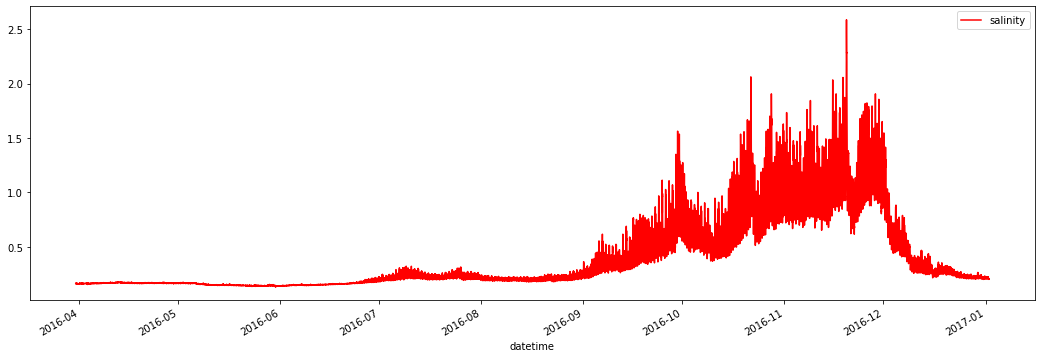

In [242]:
fig,ax1 = plt.subplots(figsize=(18,6))

df.plot(kind='line',y='salinity', color='red', ax=ax1)

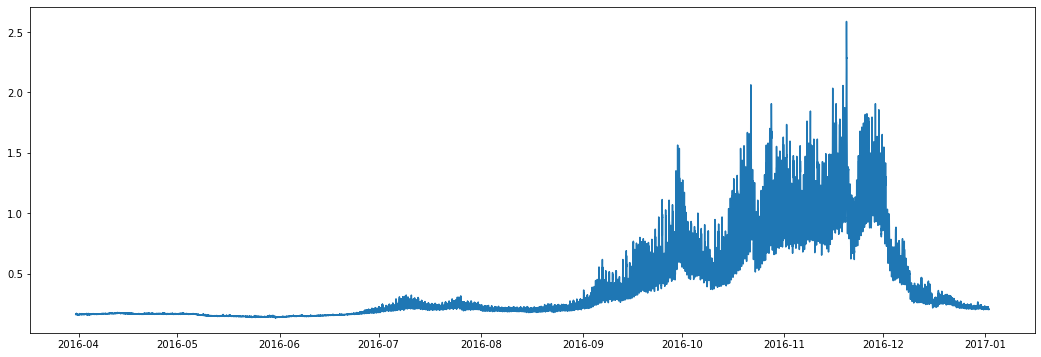

In [243]:
fig,ax1 = plt.subplots(figsize=(18,6))

plt.plot(df['date'],df['salinity'])